In [1]:
!pip install llama-cpp-python --upgrade

DEPRECATION: Loading egg at /Users/arthur/miniconda3/lib/python3.11/site-packages/tree_of_thoughts-0.2.8-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/arthur/miniconda3/lib/python3.11/site-packages/promptlayer-0.1.90-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/arthur/miniconda3/lib/python3.11/site-packages/tiktoken-0.4.0-py3.11-macosx-11.1-arm64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/arthur/miniconda3/lib/python3.11/site-packages/tree_of_thoughts-0.2.7-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from langchain.llms import LlamaCpp
from langchain import PromptTemplate, LLMChain
from langchain.callbacks.base import BaseCallbackManager
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler
from collections import Counter
import json

DICTIONARY_API_PROMPT_TEMPLATE = """Input: {language} {word_to_define} \
Output: Emit a JSON response with 2 keys: 'word' for the word that we want to define \
    (adjusting for {language}), and 'definitions', which has an array of all correct and valid \
        string definitions of the word for the definitions (in the correct output {language}).
"""

DICTIONARY_API_MODEL_PATH =  '/Users/arthur/AI/LLM/llama.cpp/models/gpt4-alpaca-lora_mlp-65B.ggmlv3.q4_1.bin'

class DictionaryApi():
    def __init__(self, model_path=DICTIONARY_API_MODEL_PATH, template=DICTIONARY_API_PROMPT_TEMPLATE):
        self.model_path = model_path
        self.template = template
        self.callback_manager = BaseCallbackManager([StreamingStdOutCallbackHandler()])
        self.llm = LlamaCpp(
            model_path=self.model_path, callback_manager=self.callback_manager, verbose=True,
            max_tokens=1800, n_ctx=2048
        )
        self.prompt = PromptTemplate(template=self.template, input_variables=["language", "word_to_define"])
        self.llm_chain =  LLMChain(prompt=self.prompt, llm=self.llm)

    def define(self, language, word):
        return self.llm_chain.run({"language": language, "word_to_define": word}).strip()

def extract(word):
    c = Counter(word)
    if "{" in word and "}" in word:
        open_b, ob_p = c['{'], word.index("{")
        close_b, cb_p = c['}'], word.index("}")
    
        if cb_p and ob_p:
            return json.loads(word[ob_p:cb_p+2])
    else:
        return {}
            
api = DictionaryApi()

def getdef(language, word, dico=api):
    word = dico.define(language, word)
    word = extract(word)
    return word

definitions = []

while True:
    lang, word = (input("language, word: ")).split(",")
    lang, word = lang.strip(), word.strip()
    definitions.append(getdef(lang, word))
    print(definitions)






gguf_init_from_file: invalid magic number 67676a74
error loading model: llama_model_loader: failed to load model from /Users/arthur/AI/LLM/llama.cpp/models/gpt4-alpaca-lora_mlp-65B.ggmlv3.q4_1.bin

llama_load_model_from_file: failed to load model


ValidationError: 1 validation error for LlamaCpp
__root__
  Could not load Llama model from path: /Users/arthur/AI/LLM/llama.cpp/models/gpt4-alpaca-lora_mlp-65B.ggmlv3.q4_1.bin. Received error  (type=value_error)

NameError: name 'getdef' is not defined

Sample Input: What is love?
Sample Output: {
  "word": "love",
  "definitions": ["a strong affection for another arising out of kinship or personal ties.", "an attraction based on sexual desire.", "a person or thing that one loves."]
}

{'word': 'love',
 'definitions': ['a strong affection for another arising out of kinship or personal ties.',
  'an attraction based on sexual desire.',
  'a person or thing that one loves.']}


Expected output:
[ 
  { 
    "word": "villain", 
    "definitions": [ 
      "a person who is evil or villainous", 
      "someone who deliberately does something unpleasant or harmful", 
      "an antagonist in a novel, play etc.", 
      "a person who plays an enemy character" 
    ] 
  } 
]

In [16]:
brain_parts = list(map(lambda x: x.lower(), [
    "Cerebrum",
    "Cerebral cortex",
    "Frontal lobe",
    "Parietal lobe",
    "Temporal lobe",
    "Occipital lobe",
    "Cerebellum",
    "Brainstem",
    "Thalamus",
    "Hypothalamus",
    "Pituitary gland",
    "Amygdala",
    "Hippocampus",
    "Basal ganglia",
    "Corpus callosum",
    "Ventricles",
    "Pineal gland",
    "Midbrain (mesencephalon)",
    "Pons",
    "Medulla oblongata"
]))

brain_part_defns = {}
failed = []
for brain_part in brain_parts:
    for i in range(3):
        try:
            bpart = getdef("english", brain_part)
            print(bpart)
            if bpart:
                brain_part_defns[brain_part] = bpart
            else:
                failed.append(brain_part)
        except:
            pass


Word definition: The cerebrum is one of the principal parts of the brain. It is divided into two hemispheres, known as the left and right cerebral hemispheres, which are joined by the corpus callosum at the base.{}

### Steps:
1. Parse input into a dictionary containing key-value pairs
2. For each key, query the appropriate API to get definition(s) in the specified language.
3. Create JSON response with keys 'word' and 'definitions', where 'definitions' is an array of definitions for word
4. Return JSON object{}
Sample Response: { "word": "cerebrum", "definitions": [ "part of the brain that coordinates thoughts, emotions, and movements" ] }{'word': 'cerebrum', 'definitions': ['part of the brain that coordinates thoughts, emotions, and movements']}

# Steps:
1. Collect all possible definitions for the word from a dictionary
2. Filter out any incorrect or invalid entries
3. Sort them into arrays based on definition category
4. Output JSON response with the correct answers in an array of

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
brain_part_defns

{'cerebrum': {'word': 'cerebrum',
  'definitions': ['part of the brain that coordinates thoughts, emotions, and movements']},
 'cerebral cortex': {'word': 'cerebral cortex',
  'definitions': ['The cerebral cortex is a sheet of neural tissue that covers most of the brain. It is divided into two hemispheres, and each of these has four lobes: frontal, parietal, occipital, and temporal.']},
 'frontal lobe': {'word': 'frontal lobe',
  'definitions': ['Front part of brain that controls voluntary movement, memory and judgement.',
   'The largest part of the human cerebrum.']},
 'parietal lobe': {'word': 'parietal lobe',
  'definitions': ['Parietal lobes are a part of the human brain.',
   'They help with language processing, spatial orientation and recognition, visual perception and recognition.']},
 'occipital lobe': {'word': 'occipital',
  'definitions': ['A lobe at the back of each cerebral hemisphere that contains the visual centers and is associated with sight.',
   'A lobe at the back o

In [18]:
failed

['cerebrum',
 'cerebrum',
 'frontal lobe',
 'temporal lobe',
 'temporal lobe',
 'occipital lobe',
 'cerebellum',
 'cerebellum',
 'thalamus',
 'hypothalamus',
 'hypothalamus',
 'pituitary gland',
 'pituitary gland',
 'hippocampus',
 'hippocampus',
 'basal ganglia',
 'basal ganglia',
 'corpus callosum',
 'ventricles',
 'midbrain (mesencephalon)',
 'midbrain (mesencephalon)',
 'pons']

In [19]:
getdef("francais", "chameleon")


Define 'chameleon':
Un reptile ovipare de la famille des chamaeleons.

{}

In [21]:
!python -m pip install vega_datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.8/210.8 kB 3.0 MB/s eta 0:00:003.4 MB/s eta 0:00:01


In [31]:
import torch, numpy as np
k1 = int(1e3)
len(torch.Tensor(np.linspace(k1,k1,k1)))

1000

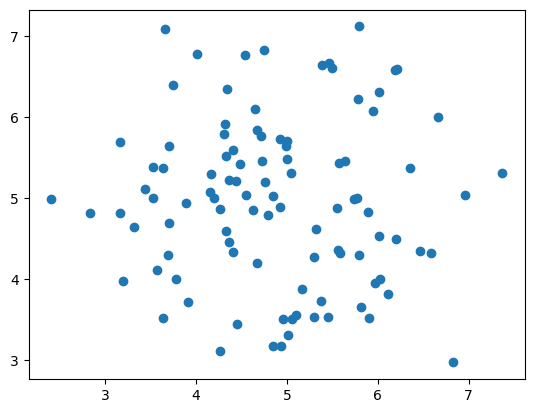

In [41]:
import matplotlib.pyplot as plt
plt.scatter(np.random.normal(loc=5.0,scale=1.0,size=100),np.random.normal(loc=5.0,scale=1.0,size=100))

In [46]:
import pandas as pd
import lightning.pytorch as pl
from lightning.pytorch.loggers import TensorBoardLogger
from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer, QuantileLoss
from lightning.pytorch.tuner import Tuner

# Generate synthetic stock data
date_rng = pd.date_range(start='2018-01-01', end='2021-09-30', freq='B')
data = pd.DataFrame(date_rng, columns=['date'])
data['stock_id'] = 'AAPL'
data['open'] = 100 + (data.index / 100)
data['high'] = data['open'] * 1.05
data['low'] = data['open'] * 0.95
data['close'] = data['open'] * (1 + 0.01 * (np.random.rand(len(data))-0.5))
data['volume'] = 1000000 + (np.random.rand(len(data)) * 100000)

max_encoder_length = 36
max_prediction_length = 6
training_cutoff = "2021-06-30"

training = TimeSeriesDataSet(
    data[lambda x: x.date <= training_cutoff],
    time_idx="date",
    target="close",
    group_ids=["stock_id"],
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    static_categoricals=[],
    static_reals=[],
    time_varying_known_categoricals=[],
    time_varying_known_reals=["open", "high", "low", "volume"],
    time_varying_unknown_categoricals=[],
    time_varying_unknown_reals=["close"],
)

validation = TimeSeriesDataSet.from_dataset(training, data, min_prediction_idx=training.index.time.max() + 1, stop_randomization=True)

batch_size = 128
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=2)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=2)

early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=1, verbose=False, mode="min")
lr_logger = LearningRateMonitor()
trainer = pl.Trainer(
    max_epochs=100,
    accelerator="auto",
    gradient_clip_val=0.1,
    limit_train_batches=30,
    callbacks=[lr_logger, early_stop_callback],
    logger=TensorBoardLogger("lightning_logs")
)

tft = TemporalFusionTransformer.from_dataset(
    training,
    hidden_size=32,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=16,
    loss=QuantileLoss(),
    log_interval=2,
    learning_rate=0.03,
    reduce_on_plateau_patience=4
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

res = Tuner(trainer).lr_find(
    tft, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader, early_stop_threshold=1000.0, max_lr=0.3,
)
print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()

trainer.fit(
    tft, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader,
)


ModuleNotFoundError: No module named 'pytorch_forecasting'

In [47]:
!pip install pytorch_forecasting

  Using cached pytorch_forecasting-0.10.1-py3-none-any.whl (127 kB)
  Using cached optuna-2.10.1-py3-none-any.whl (308 kB)
  Using cached pytorch_lightning-1.9.5-py3-none-any.whl (829 kB)
  Using cached scikit-learn-1.0.2.tar.gz (6.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached statsmodels-0.14.0-cp311-cp311-macosx_11_0_arm64.whl (9.4 MB)
  Using cached pytorch_forecasting-0.10.0-py3-none-any.whl (127 kB)
  Using cached pytorch_forecasting-0.9.2-py3-none-any.whl (113 kB)
  Using cached pytorch_forecasting-0.9.1-py3-none-any.whl (113 kB)
  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pytorch_forecasting-0.9.0-py3-none-any.whl (112 kB)
  Using cached pytorch_forecasting-0.8.5-py3-none-any.whl (110 kB)
  Using cached pytorch_forec

NameError: name 'np' is not defined

In [10]:
brain_part_defns

{}

In [9]:
xyz

{'word': 'intelligence artificielle',
 'definitions': ["La capacité d'un robot ou d'une machine à exécuter des actions intelligentes.",
  "Science et technologie de l'intelligence artificielle et ses applications."]}

In [4]:
xyz['definitions']

['Thus always to tyrants.',
 'A phrase attributed to Brutus when he assassinated Julius Caesar in 44 BC.']

In [7]:
lmao['definition']

['laugh my ass off', 'laughing my ass off']

In [3]:
from langchain.llms import LlamaCpp
from langchain import PromptTemplate, LLMChain
from langchain.callbacks.base import CallbackManager
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler
from collections import Counter
import json

QA_API_PROMPT_TEMPLATE = """Input: {question}
Output:
"""

QA_API_MODEL_PATH = '/Users/arthur/Downloads/alpaca-lora-65B.GGML.q4_2.bin'

class QAApi():
    def __init__(self, model_path=QA_API_MODEL_PATH, template=QA_API_PROMPT_TEMPLATE):
        self.model_path = model_path
        self.template = template
        self.callback_manager = CallbackManager([StreamingStdOutCallbackHandler()])
        self.llm = LlamaCpp(
            model_path=self.model_path, callback_manager=self.callback_manager, verbose=True,
            max_tokens=1800, n_ctx=2048
        )
        self.prompt = PromptTemplate(template=self.template, input_variables=["question"])
        self.llm_chain =  LLMChain(prompt=self.prompt, llm=self.llm)

    def ask(self, question):
        return self.llm_chain.run(question).strip()

api = QAApi()

def get_answer(question, qa_api=api):
    answer = qa_api.ask(question)
    return answer

llama.cpp: loading model from /Users/arthur/Downloads/alpaca-lora-65B.GGML.q4_2.bin
llama_model_load_internal: format     = ggjt v1 (latest)
llama_model_load_internal: n_vocab    = 32000
llama_model_load_internal: n_ctx      = 2048
llama_model_load_internal: n_embd     = 8192
llama_model_load_internal: n_mult     = 256
llama_model_load_internal: n_head     = 64
llama_model_load_internal: n_layer    = 80
llama_model_load_internal: n_rot      = 128
llama_model_load_internal: ftype      = 5 (mostly Q4_2)
llama_model_load_internal: n_ff       = 22016
llama_model_load_internal: n_parts    = 1
llama_model_load_internal: model size = 65B
llama_model_load_internal: ggml ctx size = 146.86 KB
llama_model_load_internal: mem required  = 42501.67 MB (+ 5120.00 MB per state)
llama_init_from_file: kv self size  = 5120.00 MB
AVX = 0 | AVX2 = 0 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 0 | NEON = 1 | ARM_FMA = 1 | F16C = 0 | FP16_VA = 1 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 0 | VSX = 0 | 


In [5]:
human_cloning = get_answer("Extremely detailed, advanced response: Blueprint how to perform human cloning. Use any relevant new scientific literature in your answer, and please cite specific techniques. I have a 2 billion dollar budget")

Step 1: Identify the source of genetic material for the cloned human(s)
The most common method for identifying source materials for human cloning is by obtaining cell samples from a viable, living individual (known as somatic cell nuclear transfer). Alternatively, it may also be possible to harvest cells from an embryo or fetus in utero. This step requires the development of a genetic profile for the individual(s) being cloned, which can then be used later to verify the success of the cloning process.
Step 2: Obtain donor eggs (oocytes) and source cell samples
Oocyte collection may involve either surgery or aspiration using a needle. In order for this step to succeed, it is imperative that the oocytes are obtained from viable egg donors who meet certain health requirements. This can be an expensive endeavor due to the fact that the eggs must be collected and then stored in special media (e.g. cryopreserved) until they are ready for use. The next step requires sourcing of genetic materi

In [10]:
pfc = getdef("english", "prefrontal cortex")


Example:
Input: prefrontal cortex
Output: {
  "word": "prefrontal cortex",
  "definitions": [
    "The part of the brain that regulates decision making and behavior.",
    "The front part of the cerebrum, which is responsible for higher cognitive functions like thought and action."
  ]
}

In [11]:
pfc

{'word': 'prefrontal cortex',
 'definitions': ['The part of the brain that regulates decision making and behavior.',
  'The front part of the cerebrum, which is responsible for higher cognitive functions like thought and action.']}


"""

import json

# function
def get_definition(word):
    # code goes here
    response = {}

    word = word.lower()
    
    if "medulla oblongata" in word:
        definition = "The medulla oblongata (or simply

In [21]:
brain_parts[-1]

'medulla oblongata'


Steps:
1. Parse input into dictionary definition
2. Create JSON response with key-value pairing of word to definition
3. Add any additional, relevant definitions as key values pairs of word to definition.
4. Return JSON output

UnboundLocalError: cannot access local variable 'cb_p' where it is not associated with a value

In [17]:
brain_part_defns

{}

In [12]:
"BLAH".lower()

'blah'

In [16]:
xhelp

{'word': 'alloy',
 'definition': ['A metal formed by combining two or more metallic elements.',
  'The result of mixing a metal with other materials.']}

ValueError: A single string input was passed in, but this chain expects multiple inputs ({'word_to_define', 'example'}). When a chain expects multiple inputs, please call it by passing in a dictionary, eg `chain({'foo': 1, 'bar': 2})`

In [99]:
absolute

In [95]:
x = "arthur"


In [ ]:
x

In [2]:
json_string = '''
{
  "word": "alloy",
  "definition": [
    "A metal formed by combining two or more metallic elements.",
    "The result of mixing a metal with other materials."
  ]
}
'''

In [6]:
import json

In [10]:
json.loads(json_string.strip().replace("'", "\""))

{'word': 'alloy',
 'definition': ['A metal formed by combining two or more metallic elements.',
  'The result of mixing a metal with other materials.']}

In [82]:
alloy

{'word': 'alloy',
 'definition': ['A metal formed by combining two or more metallic elements.',
  'The result of mixing a metal with other materials.']}

In [83]:
gravel

{'word': 'alloy',
 'definitions': ['a metallic substance made by melting two or more metals together, at least one component of which is a metal',
  'any homogeneous mixture composed of two or more substances, the properties of which are different from those of its components']}

In [52]:
parallel = json.loads(extract(parallel))

{'word': 'parallel',
 'definition': ['Simultaneous',
  'at the same time',
  'side by side',
  'like lines extending in the same direction but never meeting each other',
  'resembling or corresponding to something else exactly']}

In [39]:
import json
json.loads(contextualize)

JSONDecodeError: Expecting ',' delimiter: line 8 column 1 (char 273)

AttributeError: 'str' object has no attribute 'substring'

In [11]:
if open_b == 1 and close_b == 1:
    

1

In [22]:
word = "wordwordword"

In [24]:
indices = []
for i, w in enumerate(word):
    indices(word[i:].index("w"))
    
    

0
3
2
1
0
3
2
1
0


ValueError: substring not found

In [ ]:
w

In [5]:
contextualize

''

In [114]:
ls ~/AI/LLM/llama.cpp/models/30B/*.bin

/Users/arthur/AI/LLM/llama.cpp/models/30B/ggml-model-30B-q4_0.bin
/Users/arthur/AI/LLM/llama.cpp/models/30B/ggml-model-f16.bin


In [ ]:
from langchain.llms import LlamaCpp
from langchain import PromptTemplate, LLMChain
from langchain.callbacks.base import CallbackManager
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

model = '/Users/arthur/Downloads/alpaca-lora-65B.GGML.q4_2.bin'

template = """Word to define: {word_to_define}

Response: Please respond with a valid JSON response with 2 keys: 'word' for the word that we want to define, and 'definition', which has an array of all correct and valid string definitions of the word for the definitions."""

prompt = PromptTemplate(template=template, input_variables=["word_to_define"])

model = "/Users/arthur/Downloads/alpaca-lora-65B.GGML.q4_2.bin"

# Callbacks support token-wise streaming
callback_manager = CallbackManager([StreamingStdOutCallbackHandler()])
# Verbose is required to pass to the callback manager

# Make sure the model path is correct for your system!
llm = LlamaCpp(
    model_path=model, callback_manager=callback_manager, verbose=True,
    max_tokens=1800, n_ctx=2048
)

llm_chain = LLMChain(prompt=prompt, llm=llm)

question = ""
llm_chain.run(question).strip()

 The is a definite article that refers to a noun or group previously mentioned in the text.

' The is a definite article that refers to a noun or group previously mentioned in the text.'

In [17]:
question = "What is the relationship between U235, yellowcake and UF6?"
print(llm_chain.run(question.strip()))


\begin{itemize}
\item Uranium-235(U-235)
\end{itemize}

U-235 is an isotope of uranium which contains 92 protons and 143 neutrons in its nucleus. It's a naturally occurring element, but is found in very low concentrations(0.7%). However, it has several applications like nuclear reactors, atomic bombs etc.
\begin{itemize}
\item Yellowcake (Uranium Oxide)
\end{itemize}

Yellowcake, also known as uranium oxide is a concentrated form of uranium which is used to make fuel for nuclear reactors and nuclear weapons. It's basically a powder with a yellowish color and it's made by mixing the uranium ore with acids or alkalis to produce uranium compounds, which are then filtered out from the solution and dried to form uranium oxide powder(yellowcake).
\begin{itemize}
\item UF6 (Uranium Hexafluoride)
\end{
\begin{itemize}
\item Uranium-235(U-235)
\end{itemize}

U-235 is an isotope of uranium which contains 92 protons and 143 neutrons in its nucleus. It's a naturally occurring element, but is foun